<a href="https://colab.research.google.com/github/AzlinRusnan/Data_Management/blob/main/Bank_Turnover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Turnover Analysis**
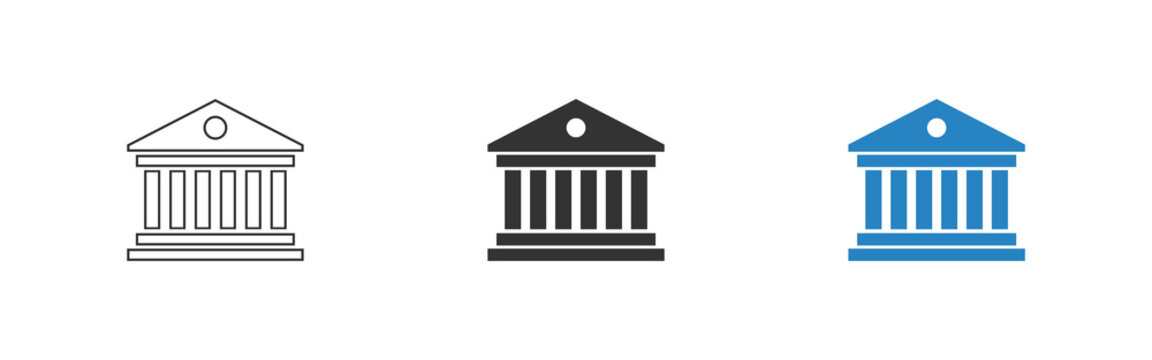

Problem Statement:

Project Overview:

Project Objectives:

##**Importing Libraries**


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

##**Basic Understanding of the Dataset**
The source of the data is from https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

This dataset contains a compiled collection of bank customer data for analyzing customer turnover.

#### **Loading Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
file_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Management/Customer-Churn-Records.csv'
df = pd.read_csv(file_path)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


#### **Checking the Dimensions of Dataset**

In [7]:
print("Total number of rows presents in the dataset is:",df.shape[0])
print("Total number of columns present in the dataset is:",df.shape[1])

Total number of rows presents in the dataset is: 10000
Total number of columns present in the dataset is: 18


#### **Checking the Attributes Names**

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

##### **Attributes Explanation:**


1.   RowNumber: Identification for each row.
2.   CustomerId: Identification for each customer that the Bank has or had.
3.   Surname: It provides information about the family name of each customer.
4.   CreditScore: It is a score assesses the creditworthiness of an individual based on their credit history and financial behavior.
5.   Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6.   Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the turnover prediction.
7.   Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8.   Tenure: It typically represents the number of years or months the customer has been associated with the bank.
9.   Balance: It reflects the amount of money in the customer's bank account at a specific point in time.as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10.  NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
11.  HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12.  IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13.  EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing turnover behavior.
14.  Exited: It indicates whether a customer has churned (1) or not (0) from the bank.
15.  Complain: It refers to customer has complaint or not.
16.  Satisfaction Score: It refers to the score provided by the customer for their complaint.
17.  Card Type: Type of card that customer hold(Diamond,Gold,Platinum,Silver)
18.  Points Earned: It is the point earned by customer for using credit card








#### **Checking Data Information**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

##### **Insight:**
The dataset contains 10,000 records across 18 columns, which include 15 numerical and 3 categorical columns.


#### **Checking the Total Number of Missing Values**

In [11]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


##### **Insight:**
As indicated by the table, there are no missing values; therefore, data imputation is not necessary.

#### **Checking for Duplicate Values**

In [14]:
duplicate_rows = df.duplicated().sum()
print("Insight: There is", duplicate_rows, "duplicate row in the dataset")

Insight: There is 0 duplicate row in the dataset
